# Importing JSON file and loading the data

In [1]:
import json
    #Importing JSON file and loading the data\n,
with open('shutdown.json') as json_data:
    shutdown_data = json.load(json_data)
    
    #Creating list with only the text key 
shutdowntweets = []
for i in shutdown_data:
    shutdowntweets.append(i["text"])
print(len(shutdowntweets))

5000


In [17]:
#The list is a list of dictionaries"
#List of all usernames of tweets that are retweeted
retweeted = []
for i in shutdown_data:
    if "retweeted_status" in i:
        retweeted.append(i["retweeted_status"]["user"]["screen_name"])
print(len(retweeted)) 

#print(retweeted)
       

4396


In [18]:
retweeted

['FoxNews',
 'FoxNews',
 'TheDailyEdge',
 'peterdaou',
 'FoxNews',
 'FoxNews',
 'FoxNews',
 'TheDailyEdge',
 'FoxNews',
 'FoxNews',
 'errolbarnett',
 'SenDougJones',
 'FoxNews',
 'peterdaou',
 'BanditRandom',
 'FoxNews',
 'FoxNews',
 'FoxNews',
 'FoxNews',
 'POSPOTHUS',
 'JeSuisCharlie9',
 'SenDougJones',
 'WalshFreedom',
 'TheDailyEdge',
 'SenDougJones',
 'FoxNews',
 'SenDougJones',
 'peterdaou',
 'peterdaou',
 'peterdaou',
 'FoxNews',
 'FoxNews',
 'FoxNews',
 'NoLabelsOrg',
 'larryelder',
 'FoxNews',
 'peterdaou',
 'FoxNews',
 'Bane_Buster',
 'TimRunsHisMouth',
 'FoxNews',
 'JeSuisCharlie9',
 'FoxNews',
 'FoxNews',
 'JeffaStier',
 'SenDougJones',
 'alicetweet',
 'zeusFanHouse',
 'FoxNews',
 'TheDailyEdge',
 'DrSonySinghMD',
 'surfermom77',
 'NoLabelsOrg',
 'FoxNews',
 'NoLabelsOrg',
 'BarackObama',
 'abcnews',
 'FoxNews',
 'FoxNews',
 'SenDougJones',
 'DrDenaGrayson',
 'BanditRandom',
 'SenDougJones',
 'NDDUnited',
 'RepMcSally',
 'FoxNews',
 'FoxNews',
 'peterdaou',
 'leahycartoons'

#  5 most popular retweet usernames

In [22]:
#getting the usernames of the tweets that have been retweeted the most
import numpy as np
retweets = []
for x in set(retweeted):
    #print(x,retweeted.count(x))
    val = x
    count = retweeted.count(x)
    retweets.append([val,count])
#print(retweets)
npretweet = np.array(retweets, dtype = 'object')
retweet_sorted = np.argsort(npretweet[:,1], axis = 0)
maxretweeted = retweet_sorted[-6:-1]
print(npretweet[maxretweeted])

[['JohnHookfox10' 79]
 ['BanditRandom' 137]
 ['TheDailyEdge' 153]
 ['peterdaou' 547]
 ['SenDougJones' 572]]


# Removing duplicate tweets

In [25]:
re.findallretweets

[['wsvn', 3],
 ['GayRepublicSwag', 5],
 ['Joyce_Karam', 2],
 ['buttegal', 1],
 ['SkepticNikki', 6],
 ['RepMcGovern', 2],
 ['abc7newsbayarea', 4],
 ['OMETA16', 1],
 ['jimsciutto', 2],
 ['funder', 5],
 ['peterdaou', 547],
 ['sylvainbrisse', 1],
 ['GrrrGraphics', 13],
 ['polpollsdaily', 1],
 ['morningmoneyben', 1],
 ['Mkts2day', 4],
 ['HollyEHinson', 1],
 ['moms4trump2018', 3],
 ['HurdOnTheHill', 3],
 ['Bane_Buster', 1],
 ['cdorobek', 6],
 ['chainsawsuit', 14],
 ['POSPOTHUS', 9],
 ['shutdown18info', 2],
 ['ForMotionCreatv', 4],
 ['mrshanemcdonald', 1],
 ['AkhilNarangMD', 14],
 ['joshfoxfilm', 1],
 ['ItsReallyNick', 11],
 ['aqv21', 1],
 ['Rob_Rogers', 3],
 ['RichardAngwin', 13],
 ['sebweinmann', 1],
 ['SenJohnMcCain', 3],
 ['profitoffacts', 21],
 ['0xMatt', 4],
 ['KokeReport', 3],
 ['tnjbrad57', 1],
 ['LarryHogan', 2],
 ['Dax_x98', 22],
 ['evelyngerson', 3],
 ['DerrickWard4', 1],
 ['MicrobesInfect', 1],
 ['RedQRedT', 1],
 ['lvjk', 1],
 ['SistaFannie', 1],
 ['News3LV', 1],
 ['AIIAmericanGir

In [4]:
#Set is a collection of unique elements in a list. Fetching the number of unique tweets
shutdown = set(shutdowntweets)
print(len(shutdowntweets))
print("There are %d unique tweets" %len(shutdown))

5000
There are 919 unique tweets


In [5]:
#We created a set above to get unique values. but sets dont support indexing and so we wont be able to use them ahead.
#so instead we do this. so we get a list and we can use it ahead. 
shutdown_unique = []
for x in shutdowntweets:
    if x not in shutdown_unique:
        shutdown_unique.append(x)
print(len(shutdown_unique))
print(type(shutdown_unique))
print(shutdown_unique[2])

919
<class 'list'>
Dear republicans/Trump supporters: Enough with the "democrats don't care about the military" BS. Compare our milita… https://t.co/aFH3xmaR77


#  Removing URLs and mentions and renaming # to ‘hashtag_’.

In [6]:
#removing urls
import re
regexp_url = 'http[s]?://(?:[a-zA-Z]|[0-9]|[$-_@.&+]|[!*\(\),]|(?:%[0-9a-fA-F][0-9a-fA-F]))+'
pattern_url = re.compile(regexp_url, re.UNICODE | re.IGNORECASE)

new_tweets1 = []
for tweets in shutdown_unique:
    x = pattern_url.sub("", tweets)
    new_tweets1.append(x)

print(new_tweets1[1])

#for tweets in new_tweets1:
    #print(tweets)
    #re.findall('https', tweets)

RT @FoxNews: BREAKING NEWS: #Shutdown enters third day as @SenateMajLdr calls for bipartisan compromise: 'Step back from the brink'
https:/…


In [7]:
#Removing mentions
regexp_mention = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))@([A-Za-z]+[A-Za-z0-9]+)'
pattern_mention = re.compile(regexp_mention, re.UNICODE | re.IGNORECASE)

new_tweets2 = []
for tweets in new_tweets1:
    x = pattern_mention.sub("", tweets)
    new_tweets2.append(x)

print(new_tweets2[1])

RT : BREAKING NEWS: #Shutdown enters third day as  calls for bipartisan compromise: 'Step back from the brink'
https:/…


In [8]:
#Replacing # with hasgtag_
regexp_hashtag = '(?<=^|(?<=[^a-zA-Z0-9-_\.]))#([A-Za-z]+[A-Za-z0-9]+)'
pattern_hashtag = re.compile(regexp_hashtag, re.UNICODE | re.IGNORECASE)

tweetsfinal = []
for tweet in new_tweets2:
    x = pattern_hashtag.sub(r'hashtag_\1', tweet)
    tweetsfinal.append(x)
print(tweetsfinal[1])

RT : BREAKING NEWS: hashtag_Shutdown enters third day as  calls for bipartisan compromise: 'Step back from the brink'
https:/…


# Vectorizing tweets using binary vectorization and finding top 5 popular hashtags

In [58]:
#Binary Vectorization
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

#Vectorizing the tweets using binary vectorization
Binary = CountVectorizer(binary = True, stop_words = 'english')
X = Binary.fit_transform(tweetsfinal)
#print(X.toarray())
#print(X.shape)

vocab = np.array(Binary.get_feature_names())

#Finding most popular hashtags
hashtags = []
for x in range(len(vocab)):
    if "hashtag" in vocab[x]:
        hashtags.append(x)
print(len(hashtags))

freqlist = []
for i in hashtags:
    freq = X[:,i].sum(0).A1
    freqlist.append((freq[0]))
        
npfreqlist = np.array(freqlist)
order = npfreqlist.argsort()[::-1]
top10freq = order[:5]

top10hashtags = []
for i in top10freq:
    x = hashtags[i]
    tag = vocab[x]
    top10hashtags.append(tag)
print("Top 5 hashtags in the are %s" %top10hashtags)

424
Top 5 hashtags in the are ['hashtag_shutdown', 'hashtag_trumpshutdown', 'hashtag_trump', 'hashtag_schumershutdown', 'hashtag_daca']


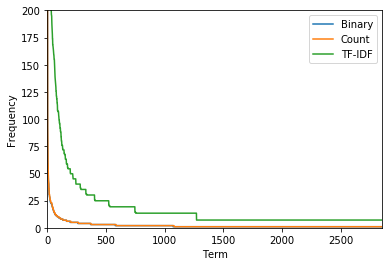

In [47]:
#Plotting the document matrix to term matrix 
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

Binary = CountVectorizer(binary = True, stop_words = 'english')
X = Binary.fit_transform(tweetsfinal)
freqbinary = np.sort(X.sum(0).A1)[::-1]

#Count vectorization
Count = CountVectorizer(stop_words = 'english')
XC = Count.fit_transform(tweetsfinal)

freqcount = np.sort(XC.sum(0).A1)[::-1]

#TF-IDF vectorization
TfIdf = TfidfVectorizer(norm = None)
XT = TfIdf.fit_transform(tweetsfinal)

freqTfIdf = np.sort(XT.sum(0).A1)[::-1]

#print(freqbinary)

#Plotting
plt.plot(freqbinary, label = "Binary")
plt.plot(freqcount, label = "Count")
plt.plot(freqTfIdf, label = "TF-IDF")
plt.xlim(0, len(freqbinary))
plt.ylim(0, 200)
plt.xlabel('Term')
plt.ylabel('Frequency')
plt.legend(loc = 'upper right')

#  Mapping DTM matrix to 2D space and ploting it using binary, count and TF-IDF vectorization. 

Dimension (919, 2854) -> (919, 2)
Dimension (919, 2854) -> (919, 2)
Dimension (919, 3069) -> (919, 2)


Text(0.5,1,'TF-IDF Verctorization in 2D space')

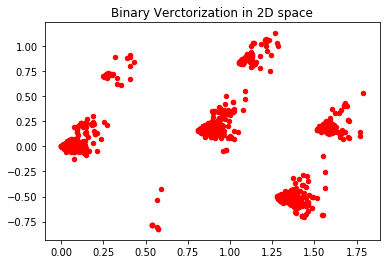

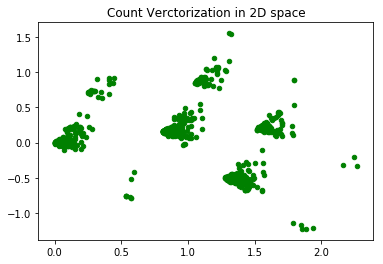

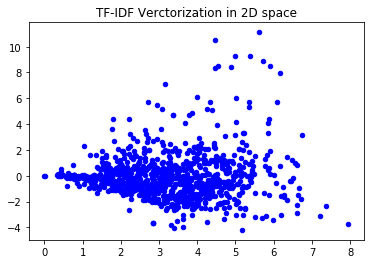

In [51]:
#Coverting the document to term matrix to 2D space
from sklearn.decomposition import TruncatedSVD
import matplotlib.pyplot as plt2

#Binary Verctorization to 2D and plot
lsaX = TruncatedSVD(2)
X_2d = lsa.fit_transform(X)

print("Dimension %s -> %s" % (X.shape, X_2d.shape))
#print(X_2d)
plt.figure(1)
plt.scatter(X_2d[:, 0], X_2d[:, 1], 20, c="r")
plt.title('Binary Verctorization in 2D space')

#Count Verctorization to 2D and plot
lsaXC = TruncatedSVD(2)
XC_2d = lsa.fit_transform(XC)

print("Dimension %s -> %s" % (XC.shape, XC_2d.shape))
#print(X_2d)
plt.figure(2)
plt.scatter(XC_2d[:, 0], XC_2d[:, 1], 20,c="g")
plt.title('Count Verctorization in 2D space')

#TF-IDF Verctorization to 2D and plot
lsaXT = TruncatedSVD(2)
XT_2d = lsa.fit_transform(XT)

print("Dimension %s -> %s" % (XT.shape, XT_2d.shape))
#print(X_2d)
plt.figure(3)
plt2.scatter(XT_2d[:, 0], XT_2d[:, 1], 20,c="b")
plt.title('TF-IDF Verctorization in 2D space')

#  Top two hashtags that appear together in a same tweet 

In [53]:
#Vectorize tweets using Binary Vectorization 

from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import numpy as np

Binary = CountVectorizer(binary = True)
X = Binary.fit_transform(tweetsfinal)
vocab = np.array(Binary.get_feature_names())
hashtag_index = [i for i, word in enumerate(vocab) if word.startswith('hashtag')]
hashtags = vocab[hashtag_index]
#print(hashtags)

#dot product to find the co-occurence of hashtags
co_matrix = (X[:,hashtag_index].T * X[:,hashtag_index])
co_matrix.setdiag(0) 
max_index = np.argwhere(co_matrix == np.amax(co_matrix))
#print(co_matrix)
print("The two hashtags that appear together the most in a tweet are", np.unique(hashtags[max_index]))

#Second most frequent hashtags
co_matrix2 = co_matrix
#print(max_index)
co_matrix2[340,389] = 0
co_matrix2[389,340] = 0
#print(co_matrix2[389,340])

max_index = np.argwhere(co_matrix2 == np.amax(co_matrix2))
hashtags = vocab[hashtag_index]
print("The two hashtags that appear together the second most in a tweet are", np.unique(hashtags[max_index]))


The two hashtags that appear together the most in a tweet are ['hashtag_shutdown' 'hashtag_trumpshutdown']
The two hashtags that appear together the second most in a tweet are ['hashtag_shutdown' 'hashtag_trump']


# What we learnt from the assignment and the Conslusion. 

*LEARNINGS*

We learnt many things from this assignment.

Starting from importing a JSON file and extracting only few key,value pairs from it to understanding data structures with list of dictionaries. 

We learn about regular expressions and how to transform textual data to transform data into the desired form. We removed url and mentions since we did not want to do any analysis on them and renames # to hashtag_ to make it easiter to work with and analyse hashtags. 

We learn binary, count and TF-IDF vectorization and its differences, converting data to 2D and plotting it.
BINARY VECTORIZATION - Creates a document to term matrix with 0/1 values denoting weather the word is present or not. 
COUNT VECTORIZATION -  Creates a document to term matrix with values denoting the frequency of the words in the doc. 
TF-IDF VECTORIZATION - Creates a document to term matrix with values denoting the normalised form of frequencies. 
Looking at the count and binary vectorization plots, we can observe that simillar words with simillar frequencies have been clustered together. Since the TF-IDF vectorization normalises the frequencies/values in the DTM, the TF-IDF plot is more normalized, in the sense that it doesnt have varied distinguishable clusters. 

We then used dot product of DTM matrices to find the hashtags that occur together the most. 

*CONCLUSION*

The top 5 usernames of the tweets that have been retweeted the most are :  
JohnHookfox10
BanditRandom
TheDailyEdge
peterdaou
SenDougJones

There are a totla of 5000 tweets in the data out of which here are 919 unique tweets. 

There are a total of 424 hashtags in the data out o which the top 5 most popular hashtags are :
hashtag_shutdown
hashtag_trumpshutdown
hashtag_trump
hashtag_schumershutdown
hashtag_daca

The two hashtags that appear together the most in a tweet are 'hashtag_shutdown' 'hashtag_trumpshutdown'
The two hashtags that appear together the second most in a tweet are 'hashtag_shutdown' 'hashtag_trump'

From the above results we can say that #shutdown is used majorly in reference to Trump and his government and is an indicator of the animosity people have against the Trump government. 
